# Show effectiveness of windowing for reducing leakage

In [1]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

import cmath

Running Python: 3.8.17
Running Sympy: 1.12rc1


## Create some data from a multi-sine signal

In [2]:
# Number of sample points
N = 2048

fs = 500 # sample freq
Ts = 1/fs # sample period
w1 = 50*2*np.pi
w2 = 75*2*np.pi
w3 = 100*2*np.pi

t = np.linspace(0.0, N*Ts, N, endpoint=False)
y = np.sin(w1*t) - 0.5*np.sin(w2*t) + 0.25*np.sin(w3*t)

## Do FFT to find freq plot from the N data points

In [3]:
Yf = fft(y)
xf = fftfreq(N, 1/fs)
xf_plot = fftshift(xf)
Yf_plot = 1.0/N * fftshift(Yf)

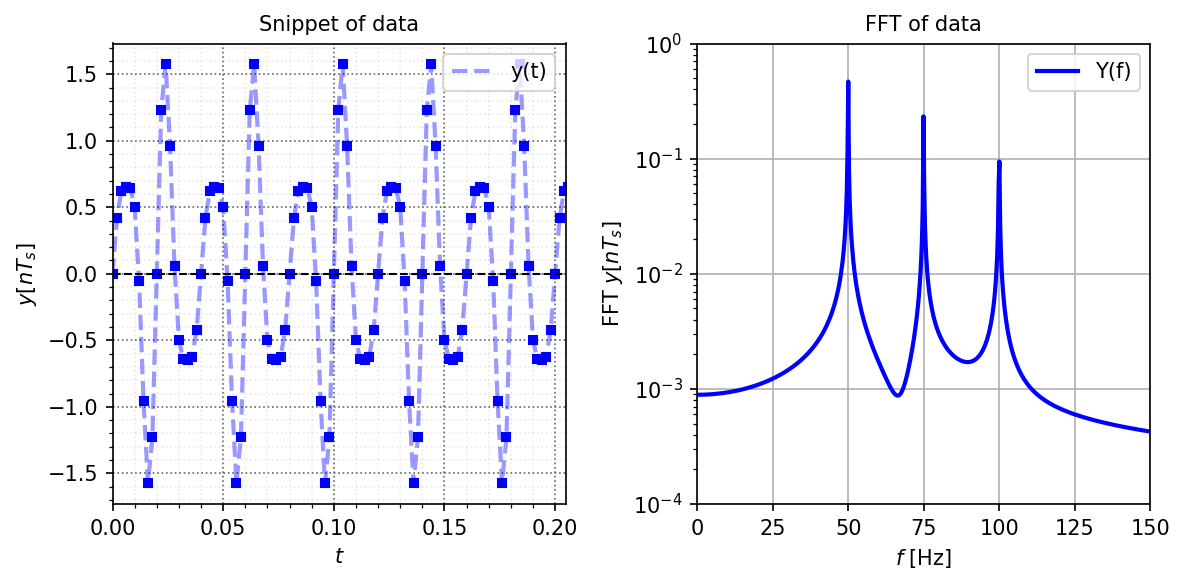

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4), dpi=150)
fig.tight_layout(pad=2)
ax1.plot(t, y,'b--',alpha=0.4)
ax1.plot(t, y,'bs',ms=4)
ax1.set_ylabel('$y[nT_s]$')
ax1.set_xlabel('$t$')
ax1.set_xlim([0, max(t)/20])
ax1.legend(['y(t)'])
ax1.set_title('Snippet of data')
nicegrid(ax1)

ax2.semilogy(xf_plot, np.abs(Yf_plot),'b-')
ax2.set_ylabel('FFT $y[nT_s]$')
ax2.set_xlabel('$f$ [Hz]')
ax2.set_xlim([0, 150])
ax2.set_ylim([1e-4, 1])
ax2.legend(['Y(f)'])
ax2.set_title('FFT of data')
fig.savefig('./figs/T8_Leakage_1.png', dpi=300)
plt.show()

## Add a window to the data to reduce leakage

In [5]:
w = blackman(N)
Ywf = fft(y*w)
Ywf_plot = 1.0/N * fftshift(Ywf)

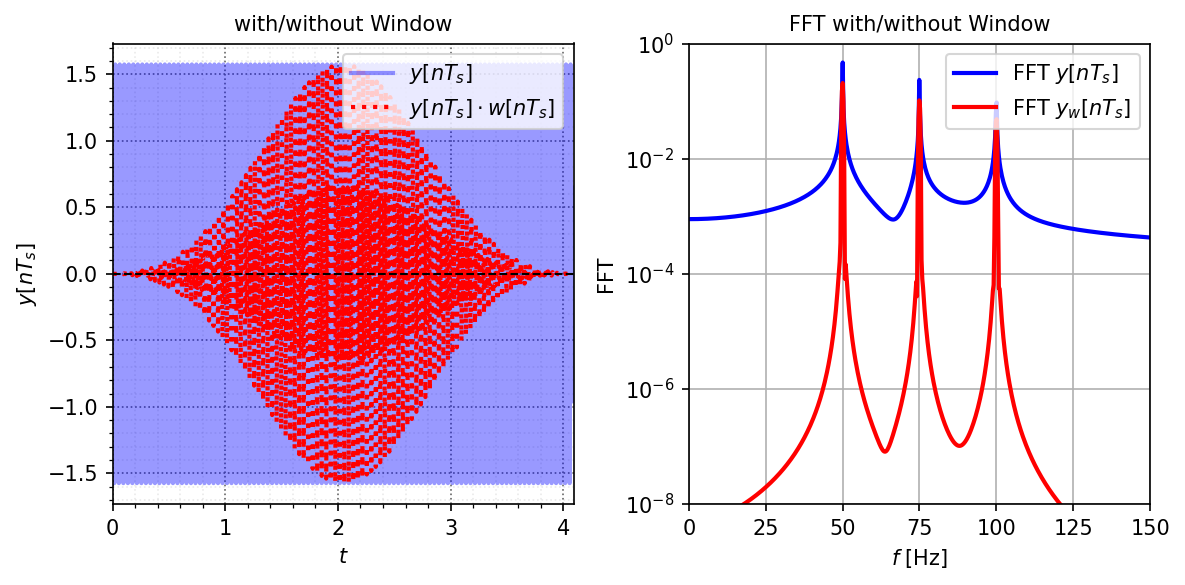

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4), dpi=150)
fig.tight_layout(pad=2)
ax1.plot(t, y,'b-',alpha=0.4)
ax1.plot(t, y*w ,'r:')
ax1.set_ylabel('$y[nT_s]$')
ax1.set_xlabel('$t$')
ax1.legend(['$y[nT_s]$', '$y[nT_s]\cdot w[nT_s]$'])
ax1.set_title('with/without Window')
nicegrid(ax1)

ax2.semilogy(xf_plot, np.abs(Yf_plot), '-b')
ax2.semilogy(xf_plot, np.abs(Ywf_plot), '-r')
ax2.set_ylabel('FFT')
ax2.set_xlabel('$f$ [Hz]')
ax2.set_xlim([0, 150])
ax2.set_ylim([1e-8, 1])
ax2.legend(['FFT $y[nT_s]$', 'FFT $y_w[nT_s]$'])
ax2.set_title('FFT with/without Window')
fig.savefig('./figs/T8_Leakage_1.png', dpi=300)
plt.show()